# Установка PySpark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

spark-2.4.3-bin-hadoop2.7/
spark-2.4.3-bin-hadoop2.7/python/
spark-2.4.3-bin-hadoop2.7/python/setup.cfg
spark-2.4.3-bin-hadoop2.7/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.3-bin-hadoop2.7/python/pyspark

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Загрузка данных из CSV

In [0]:
df = spark.read.csv('iris.csv', inferSchema=True, header=True)

# Базовый обзор данных

In [8]:
df.count()

150

In [9]:
df.dtypes

[('sepal.length', 'double'),
 ('sepal.width', 'double'),
 ('petal.length', 'double'),
 ('petal.width', 'double'),
 ('variety', 'string')]

In [10]:
df.show(10)

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



In [0]:
df=df.withColumnRenamed('sepal.length', 'sepal_length')
df=df.withColumnRenamed('sepal.width', 'sepal_width')
df=df.withColumnRenamed('petal.length', 'petal_length')
df=df.withColumnRenamed('petal.width', 'petal_width')


# Практика 1. Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров

In [0]:
dfGrp=df.groupBy('variety')

In [29]:
df_max=dfGrp.max('sepal_length','sepal_width','petal_length','petal_width')
df_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [30]:
df_min=dfGrp.min('sepal_length','sepal_width','petal_length','petal_width')
df_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [31]:
df_avg=dfGrp.avg('sepal_length','sepal_width','petal_length','petal_width')
df_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



# Практика 2. Визуализируйте точечный график (plt.scatter) по каждой паре параметров

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pd_df = df.toPandas()

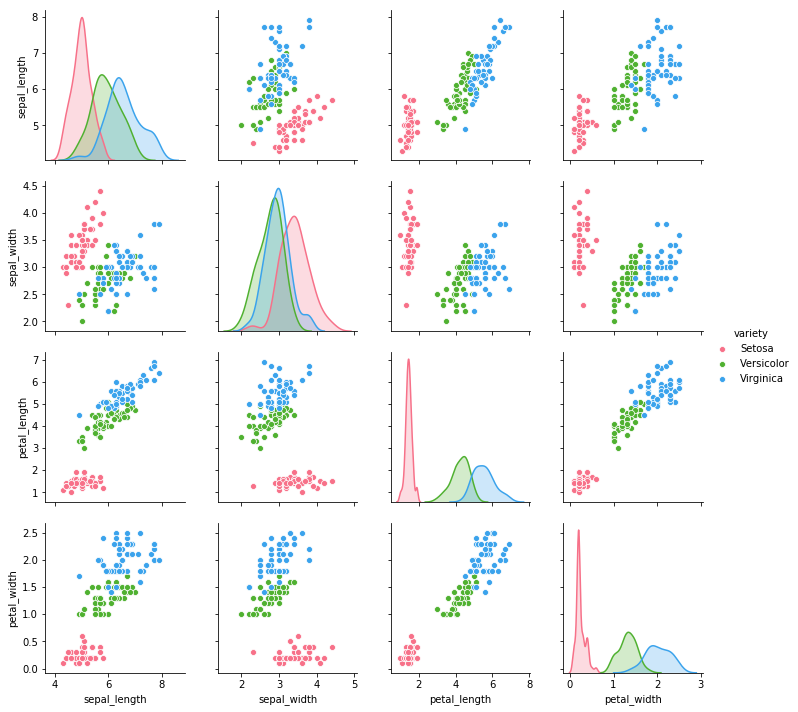

In [40]:
sns_plot=sns.pairplot(data=pd_df, hue='variety',palette='husl')
sns_plot

# Практика 3. Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)

In [48]:
from pyspark.sql.functions import lit
df_prediction=df.withColumn('prediction',lit('not_predicted'))
df_prediction.show()

+------------+-----------+------------+-----------+-------+-------------+
|sepal_length|sepal_width|petal_length|petal_width|variety|   prediction|
+------------+-----------+------------+-----------+-------+-------------+
|         5.1|        3.5|         1.4|        0.2| Setosa|not_predicted|
|         4.9|        3.0|         1.4|        0.2| Setosa|not_predicted|
|         4.7|        3.2|         1.3|        0.2| Setosa|not_predicted|
|         4.6|        3.1|         1.5|        0.2| Setosa|not_predicted|
|         5.0|        3.6|         1.4|        0.2| Setosa|not_predicted|
|         5.4|        3.9|         1.7|        0.4| Setosa|not_predicted|
|         4.6|        3.4|         1.4|        0.3| Setosa|not_predicted|
|         5.0|        3.4|         1.5|        0.2| Setosa|not_predicted|
|         4.4|        2.9|         1.4|        0.2| Setosa|not_predicted|
|         4.9|        3.1|         1.5|        0.1| Setosa|not_predicted|
|         5.4|        3.7|         1.5

In [60]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

def func(length, width):
 if length<=1.9 and width<=0.6:
  return 'Setosa'
 if length>1.9 and length<=5.1:
  return 'Versicolor'
 else: return('Virginica')
  
func_udf = udf(func, StringType())
df_prediction = df_prediction.withColumn('prediction',func_udf(df_prediction['petal_length'], df_prediction['petal_width']))
df_prediction.show()
  

+------------+-----------+------------+-----------+-------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|prediction|
+------------+-----------+------------+-----------+-------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|    Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|    Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|    Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|    Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|    Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|    Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|    Setosa|
|     

# Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)

In [69]:
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F

def func1(real, pred):
 if real==pred:
  return 1
 else: return 0
  
func_udf1 = udf(func1, IntegerType())
df_prediction = df_prediction.withColumn('quality',func_udf1(df_prediction['variety'], df_prediction['prediction']))


Column<b'sum(quality)'>

In [70]:
df_prediction.show()

+------------+-----------+------------+-----------+-------+----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|prediction|quality|
+------------+-----------+------------+-----------+-------+----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|    Setosa|      1|
|         4.9|        3.0|         1.4|        0.2| Setosa|    Setosa|      1|
|         4.7|        3.2|         1.3|        0.2| Setosa|    Setosa|      1|
|         4.6|        3.1|         1.5|        0.2| Setosa|    Setosa|      1|
|         5.0|        3.6|         1.4|        0.2| Setosa|    Setosa|      1|
|         5.4|        3.9|         1.7|        0.4| Setosa|    Setosa|      1|
|         4.6|        3.4|         1.4|        0.3| Setosa|    Setosa|      1|
|         5.0|        3.4|         1.5|        0.2| Setosa|    Setosa|      1|
|         4.4|        2.9|         1.4|        0.2| Setosa|    Setosa|      1|
|         4.9|        3.1|         1.5|        0.1| 

# Домашнее задание
- Скачайте dataset iris https://gist.github.com/netj/8836201
- Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
- Визуализируйте точечный график (plt.scatter) по каждой паре параметров
- Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
- Сделайте отдельную колонку для своего предсказания
- Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)